In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpol
from pyccl._core import UnlockInstance
from scipy import signal

# BCM

In [3]:
import BCMprofiles_Copy3 as BCMprofiles
BCMprofiles.__all__

('StellarProfile',
 'EjectedGasProfile',
 'BoundGasProfile',
 'CombinedGasProfile',
 'CombinedStellarGasProfile',
 'CombinedAllBCMProfile')

## Setting up pars & profiles

In [5]:
hmd_200c = ccl.halos.MassDef200c # use a mass definition with Delta = 200
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200c)
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
# change h=0.07 to h=0.7

trial_r = np.geomspace(1E-2,1E8,100_000) # geomspace is like linspace, but evenly spaces on a logscale
trial_k = np.geomspace(5E-3,1E2,100_000) # np.geomspace(1E-3,1E2,100000)
trial_M = np.array([3E12,6E13, 1E14])
trial_gamma = 1.1  # working with z = 0 (today) ; therefore a = 1 [default]
trial_f_bd = 0.6

## Loading profiles, with fourier_analytic = True

In [7]:
stel_profile = BCMprofiles.StellarProfile(cosmo, hmd_200c)
ej_profile = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c)
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, fourier_analytic = True)#, trial_gamma)
gas_profile = BCMprofiles.CombinedGasProfile(cosmo, hmd_200c, cM)#, trial_gamma)
stelGas_profile = BCMprofiles.CombinedStellarGasProfile(cosmo, hmd_200c, cM)#, trial_gamma) 
bcm_profile = BCMprofiles.CombinedAllBCMProfile(cosmo, hmd_200c, cM)#, trial_gamma)

In [8]:
stel_real = stel_profile._real(cosmo, trial_r, trial_M)
ej_real = ej_profile._real(cosmo, trial_r, trial_M)
bd_real = bd_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
gas_real = gas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma, f_bd=trial_f_bd)
stelGas_real = stelGas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
bcm_real = bcm_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)

In [9]:
stel_fourier = stel_profile._fourier(trial_k, trial_M)
ej_fourier = ej_profile._fourier(trial_k, trial_M)
bd_fourier = bd_profile._fourier(k=trial_k, M=trial_M, scale_a=1, Gamma=trial_gamma)
gas_fourier = gas_profile._fourier(trial_k, trial_M, scale_a=1, f_bd=trial_f_bd, Gamma=trial_gamma)
stelGas_fourier = stelGas_profile._fourier(trial_k, trial_M, Gamma=trial_gamma)
bcm_fourier = bcm_profile._fourier(trial_k, trial_M, Gamma=trial_gamma)

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through
Qany = 64.1% through
Qany = 65.6% through
Qany = 67.2% through
Qany = 68.8% through
Qany = 70.3% through
Qany = 71.9% through
Qany = 73.4% through
Qany = 75% throug

## Loading profiles, with fourier_analytic = False

In [11]:
stel_profile_false = BCMprofiles.StellarProfile(cosmo, hmd_200c, fourier_analytic=False)
ej_profile_false = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c, fourier_analytic=False)
bd_profile_false = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, fourier_analytic=False)
gas_profile_false = BCMprofiles.CombinedGasProfile(cosmo, hmd_200c, cM, fourier_analytic=False)
stelGas_profile_false = BCMprofiles.CombinedStellarGasProfile(cosmo, hmd_200c, cM, fourier_analytic=False) 
bcm_profile_false = BCMprofiles.CombinedAllBCMProfile(cosmo, hmd_200c, cM, fourier_analytic=False)

In [12]:
stel_real_false = stel_profile_false._real(cosmo, trial_r, trial_M)
ej_real_false = ej_profile_false._real(cosmo, trial_r, trial_M)
bd_real_false = bd_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
gas_real_false = gas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma, f_bd=trial_f_bd)
stelGas_real_false = stelGas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
bcm_real_false = bcm_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)

In [17]:
stel_fourier_false = stel_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
ej_fourier_false = ej_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
bd_fourier_false = bd_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)#, Gamma=trial_gamma)
gas_fourier_false = gas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)#, Gamma=trial_gamma)
# stelGas_fourier_false = stelGas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
# bcm_fourier_false = bcm_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

In [18]:
stelGas_fourier_false = stelGas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
bcm_fourier_false = bcm_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

ValueError: rs should have 3 elements

## Loading (real) profiles with call_interp=False (check with/without interpolator)

In [20]:
bd_real_noInterp = bd_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
gas_real_noInterp = gas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, f_bd=trial_f_bd, call_interp=False)
stelGas_real_noInterp = stelGas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
bcm_real_noInterp = bcm_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)

bd_real_false_noInterp = bd_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
gas_real_false_noInterp = gas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, f_bd=trial_f_bd, call_interp=False)
stelGas_real_false_noInterp = stelGas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
bcm_real_false_noInterp = bcm_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)

False
False
False
False
False
False
False
False


# Checking plots/profiles

### Checking whether the analytical & numerical Fourier plots match for the Bound gas profile

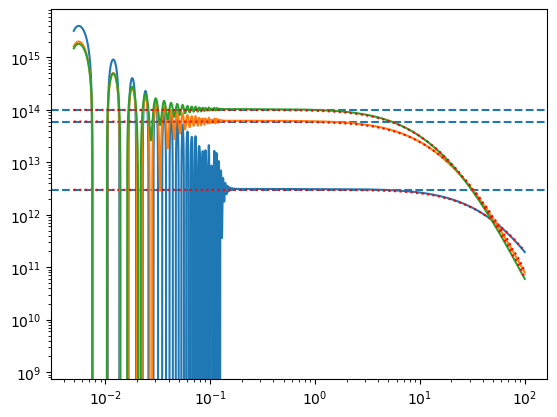

In [25]:
four_plot, four_plot2 = bd_fourier_false, bd_fourier[0]
for prof, prof2, mass in zip(four_plot, four_plot2, trial_M):
    plt.plot(trial_k, prof)
    plt.plot(trial_k, prof2, 'r:')
    plt.axhline(mass, linestyle='--', zorder=1)
plt.yscale('log')
plt.xscale('log');

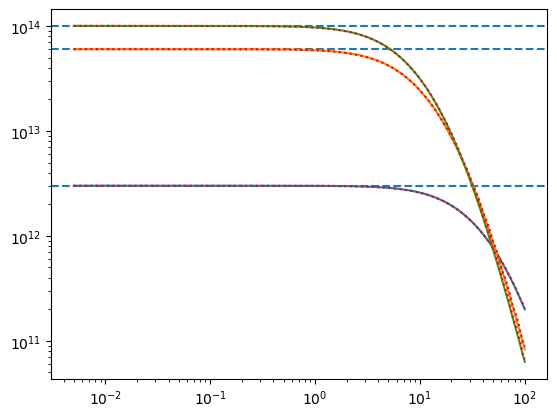

In [27]:
# Update precision of FFT (numerical) transform
bd_profile_false.update_precision_fftlog(padding_hi_fftlog=1E2,
                           padding_lo_fftlog=1E-2,
                           n_per_decade=1000,
                           plaw_fourier=-2.) # recheck docs on what pars do/are (from CCLX Halo profiles notebook)
bd_fourier_false = bd_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
four_plot, four_plot2 = bd_fourier_false, bd_fourier[0]
for prof, prof2, mass in zip(four_plot, four_plot2, trial_M):
    plt.plot(trial_k, prof)
    plt.plot(trial_k, prof2, 'r:')
    plt.axhline(mass, linestyle='--', zorder=1)
plt.yscale('log')
plt.xscale('log');

## g

In [46]:
print(trial_M)

[3.e+12 6.e+13 1.e+14]


In [54]:
print('Should get:  $4 \\pi \\int^{\\infty}_0 r^2 g(r) dr = 1 $, when normalised by mass')
print('With Interpolator \n')
print('gas: ', integrate.simpson(4*np.pi*(trial_r**2)*gas_real, x = trial_r)/trial_M, '\n\n Without interpolator')

print('stellar: ', integrate.simpson(4*np.pi*(trial_r**2)*stel_real, x = trial_r)/trial_M)
print('ejected: ', integrate.simpson(4*np.pi*(trial_r**2)*ej_real, x = trial_r)/trial_M)
print('bound: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r)/trial_M)
print('gas: ', integrate.simpson(4*np.pi*(trial_r**2)*gas_real_noInterp, x = trial_r)/trial_M)

Should get:  $4 \pi \int^{\infty}_0 r^2 g(r) dr = 1 $, when normalised by mass
With Interpolator 

bound:  [0.97655719 0.99859019 0.99897545]
gas:  [0.9859341  0.99915411 0.99938526] 

 Without interpolator
stellar:  [9.64514191e-10 9.64514191e-10 9.64514191e-10]
ejected:  [0.99999946 0.99999997 0.99999998]
bound:  [0.97710228 0.99914758 0.99953304]
gas:  [0.98626115 0.99948853 0.99971982]


For NFW, get that $4 \pi \int^{\infty}_0 r^2\ g(r)\ dr\ \simeq 1$ as should.      
See that $4 \pi \int^{\infty}_0 r^2 g(r)\ dr \simeq 1 \times 10^{-9}$ for stellar.    

### For NFW, get that $4 \pi \int^{\infty}_0 r^2\ g(r)\ dr\ \simeq 1$ as should

In [29]:
NFWprofile_false = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=False) 
NFWprofile_true = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=True) 

In [37]:
nfw_real_true = NFWprofile_true._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_true = NFWprofile_true.fourier(cosmo, trial_k, trial_M, a=1)

In [39]:
nfw_real_false = NFWprofile_false._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_false = NFWprofile_false.fourier(cosmo, trial_k, trial_M, a=1)

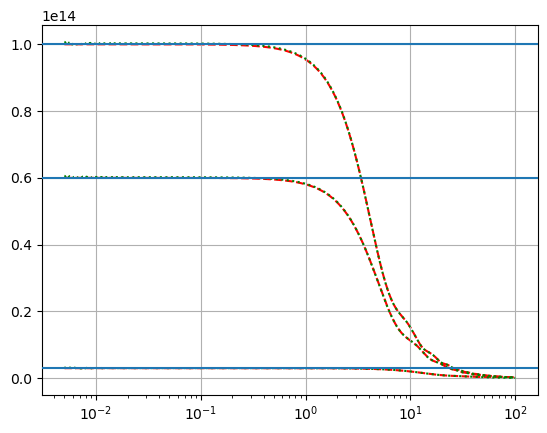

In [41]:
i = 0
for mass in zip(trial_M):
    plt.plot(trial_k, nfw_fourier_true[i], 'r--', zorder=1)
    plt.plot(trial_k, nfw_fourier_false[i], 'g:', zorder=2)
    plt.axhline(mass, zorder=3)
    i+=1
plt.grid(True)
plt.xscale('log');

$\rho(k)\ = \frac{M}{a^3} \bar{g}(k)\ $, where $\bar{g}(k \to 0)\ = 1 $ if normalised correctly.   
Here, using $a = 1$, so [profile/mass] = g(k)

## Check Bound Gas

In [99]:
trial_gamma
# default limInt=(1E-5, 7E3)): # originally: limInt=(1E-4, 1E4)

1.1

In [149]:
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, limInt=(1E-3, 5E3))
# __init__(self, cosmo, mass_def, concentration, fourier_analytic = True, gammaRange = (3, 20), ngamma=64, 
# qrange=(1e-4, 1e2), nq=64, limInt=(1E-5, 7E3)): # originally: limInt=(1E-4, 1E4)
bd_fourier = bd_profile._fourier(k=trial_k, M=trial_M, scale_a=1, Gamma=trial_gamma)
# _fourier_analytic(self, k, M, scale_a=1, Gamma=1.1):

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through
Qany = 64.1% through
Qany = 65.6% through
Qany = 67.2% through
Qany = 68.8% through
Qany = 70.3% through
Qany = 71.9% through
Qany = 73.4% through
Qany = 75% throug

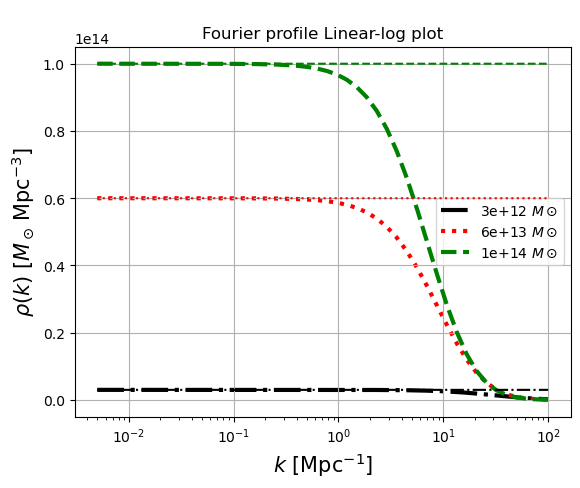

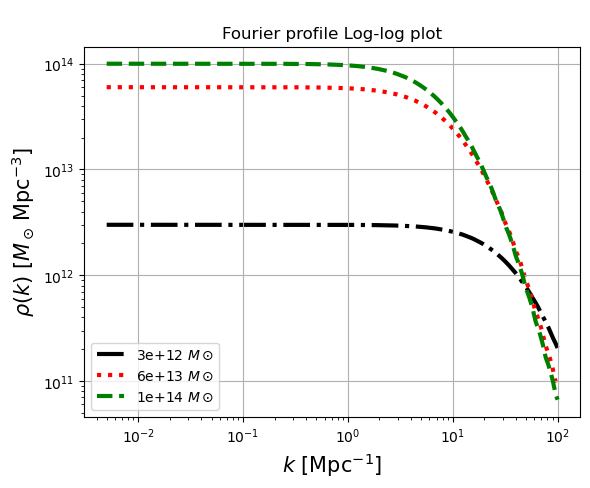

In [150]:
colours, i = ['k-.', 'r:', 'g--'], 0
title_fourier = '\nFourier profile' 
for mass, col, fourier in zip(trial_M, colours, bd_fourier[0]):
    plt.plot(trial_k, fourier, col, lw=3, zorder = i, label=f'{mass:.1g} $M \\odot $')
    plt.plot(trial_k, 1*trial_k + mass, col, zorder=(10-i))#, label=f'{mass:.1g} $M \\odot /a^3$')  # here, a=1
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title(title_fourier+' Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');   #plt.xlim(1e-2,1e5);   #plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for j, col in zip(trial_M, colours):
    plt.plot(trial_k, bd_fourier[0,i], col, lw=3, zorder = i, label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title(title_fourier+' Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log'); 

#### Checking limits of integration, etc

In [65]:
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM)
gamma_list = np.linspace(bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma)
prof1 = bd_profile._real(cosmo, trial_r, 1E14, scale_a=1, Gamma=trial_gamma, call_interp=False)
prof2 = bd_profile._real(cosmo, trial_r, 1E14,  scale_a=1, Gamma=trial_gamma, call_interp=True)
print(prof1/prof2)
print(gamma_list)

False
[1.00055817 1.00055817 1.00055817 ... 1.00055817 1.00055817 1.00055817]
[ 3.          3.26984127  3.53968254  3.80952381  4.07936508  4.34920635
  4.61904762  4.88888889  5.15873016  5.42857143  5.6984127   5.96825397
  6.23809524  6.50793651  6.77777778  7.04761905  7.31746032  7.58730159
  7.85714286  8.12698413  8.3968254   8.66666667  8.93650794  9.20634921
  9.47619048  9.74603175 10.01587302 10.28571429 10.55555556 10.82539683
 11.0952381  11.36507937 11.63492063 11.9047619  12.17460317 12.44444444
 12.71428571 12.98412698 13.25396825 13.52380952 13.79365079 14.06349206
 14.33333333 14.6031746  14.87301587 15.14285714 15.41269841 15.68253968
 15.95238095 16.22222222 16.49206349 16.76190476 17.03174603 17.3015873
 17.57142857 17.84126984 18.11111111 18.38095238 18.65079365 18.92063492
 19.19047619 19.46031746 19.73015873 20.        ]


3 20 64
1.3333333333333333 1.05 1.1
0.0001 1e+04


/var/folders/fj/p1qj16jj5pl9df1rgw6p12tc000vry/T/ipykernel_77073/3743333916.py:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-5, 1E5, args = g)[0]
/var/folders/fj/p1qj16jj5pl9df1rgw6p12tc000vry/T/ipykernel_77073/3743333916.py:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-5, 1E5, args = g)[0]


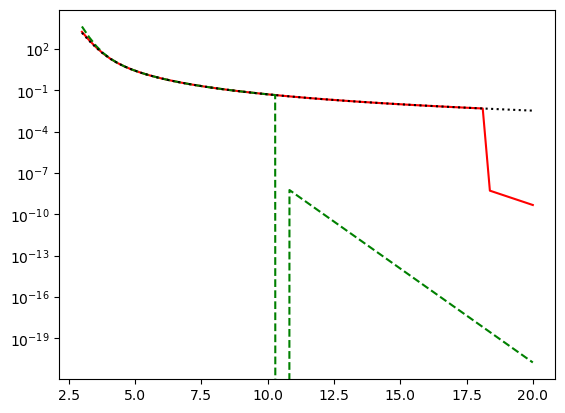

In [169]:
I0_array = np.zeros(bd_profile.ngamma)
#gamma_list = np.linspace(1.05, 3, 64)  # for Gamma, args = 1/(g-1), not gamma args=g
gamma_list = np.linspace(bd_profile.gammaRange[0], 20,#bd_profile.gammaRange[1], 
                         bd_profile.ngamma)
print(bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma)
print(1/(bd_profile.gammaRange[0]) + 1, 1/(bd_profile.gammaRange[1]) + 1, 1/10 + 1)
print(f'{bd_profile.limInt[0]:.1g}', f'{bd_profile.limInt[1]:.1g}')

for i, g in enumerate(gamma_list):
    I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-4, 1E4, args = g)[0]
#func_normQ0 = interpol.interp1d(gamma_list, I0_array)
plt.plot(gamma_list, I0_array, 'r-')

for i, g in enumerate(gamma_list):
    I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-5, 1E5, args = g)[0]
plt.plot(gamma_list, I0_array, 'g--')

for i, g in enumerate(gamma_list):
    I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-5, 7E3, args = g)[0]
plt.plot(gamma_list, I0_array, 'k:')
plt.yscale('log');

3 20 64
1.3333333333333333 1.05 1.1
0.0001 1e+04


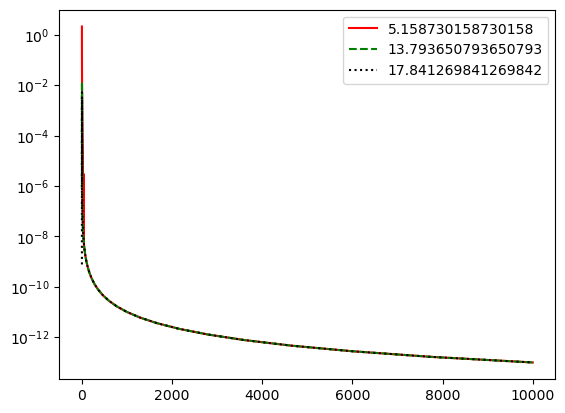

In [171]:
I0_array = np.zeros(bd_profile.ngamma)
gamma_list = np.linspace(bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma)
print(bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma)
print(1/(bd_profile.gammaRange[0]) + 1, 1/(bd_profile.gammaRange[1]) + 1, 1/10 + 1)
print(f'{bd_profile.limInt[0]:.1g}', f'{bd_profile.limInt[1]:.1g}')
def integralQany(x, gam): 
    return x * bd_profile._shape(x, gam) 
    
g = gamma_list[8]
for j, q in enumerate(q_array): 
    I0_array[j] =  integrate.quad(integralQany, 1E-5, 7E3, args = g, weight = "sin", wvar=q)[0] / q
plt.plot(q_array, I0_array, 'r-', label=g)
plt.legend(loc='best');

g = gamma_list[40]
for j, q in enumerate(q_array):
    I0_array[j] =  integrate.quad(integralQany, 1E-5, 7E3, args = g, weight = "sin", wvar=q)[0] / q
plt.plot(q_array, I0_array, 'g--', label=g);
plt.legend(loc='best');

g = gamma_list[55]
for j, q in enumerate(q_array):         
    I0_array[j] =  integrate.quad(integralQany, 1E-5, 7E3, args = g, weight = "sin", wvar=q)[0] / q
plt.plot(q_array, I0_array, 'k:', label=g);
plt.legend(loc='best');
plt.yscale('log')

In [89]:
bd_profile._norm_interpol2
print(bd_profile.qrange[0], bd_profile.qrange[1], bd_profile.nq, bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma)

0.0001 100.0 64 3 20 64


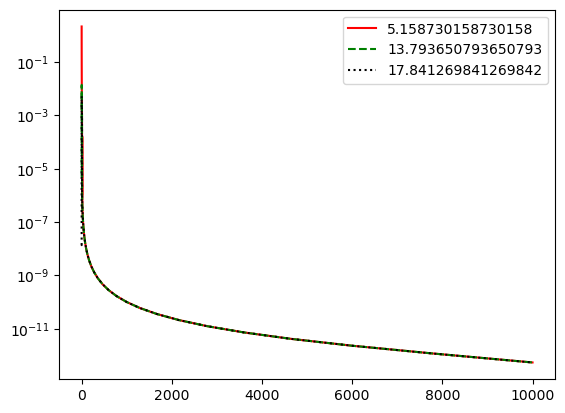

In [125]:
gamma_list = np.linspace(bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma) 
q_array = np.geomspace(1e-3, 1e4, bd_profile.nq)
I0_array =  np.zeros(bd_profile.nq)

def integralQany(x, gam): 
    return x * bd_profile._shape(x, gam) 
    
g = gamma_list[8]
for j, q in enumerate(q_array): 
    I0_array[j] =  integrate.quad(integralQany, bd_profile.limInt[0], bd_profile.limInt[1], args = g, weight = "sin", wvar=q)[0] / q
plt.plot(q_array, I0_array, 'r-', label=g)
plt.legend(loc='best');

g = gamma_list[40]
for j, q in enumerate(q_array):
    I0_array[j] =  integrate.quad(integralQany, bd_profile.limInt[0], bd_profile.limInt[1], args = g, weight = "sin", wvar=q)[0] / q
plt.plot(q_array, I0_array, 'g--', label=g);
plt.legend(loc='best');

g = gamma_list[55]
for j, q in enumerate(q_array):         
    I0_array[j] =  integrate.quad(integralQany, bd_profile.limInt[0], bd_profile.limInt[1], args = g, weight = "sin", wvar=q)[0] / q
plt.plot(q_array, I0_array, 'k:', label=g);
plt.legend(loc='best');
plt.yscale('log')

#### THERE DOES SEEM TO BE A PROBLEM WITH THE INTERPOLATOR

In [81]:
print('Masses are:', trial_M)
print('        $4 \\pi \\int^{\\infty}_0 r^2 g(r) dr$')
print('With interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r))
print('Without interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r))
print('        Normalised by mass')
print('With interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r)/trial_M)
print('Without interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r)/trial_M)

Masses are: [3.e+12 6.e+13 1.e+14]
        $4 \pi \int^{\infty}_0 r^2 g(r) dr$
With interpolator:  [2.92967158e+12 5.99154116e+13 9.98975446e+13]
Without interpolator:  [2.93130684e+12 5.99488545e+13 9.99533043e+13]
        Normalised by mass
With interpolator:  [0.97655719 0.99859019 0.99897545]
Without interpolator:  [0.97710228 0.99914758 0.99953304]


In [84]:
print((integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r)/trial_M) / (integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r)/trial_M))

[1.00055817 1.00055817 1.00055817]


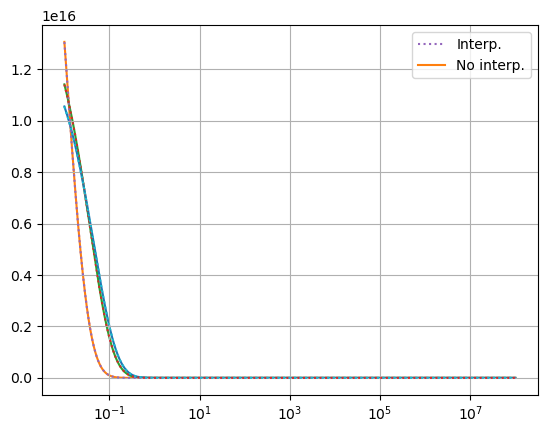

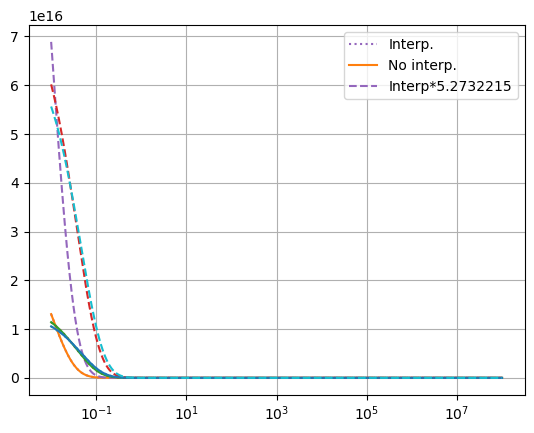

In [86]:
colour1, colour2 = ['tab:purple','tab:red','tab:cyan'], ['tab:orange','tab:green','tab:blue']
for mass, col1, col2, interp, nointerp in zip(trial_M, colour1, colour2, bd_real, bd_real_noInterp):
    plt.plot(trial_r, interp, ':', color=col1)#, label=f'Interpolated: {mass:.1g} $M \\odot $')
    plt.plot(trial_r, nointerp, color=col2, zorder=1)#, label=f'No interp.: {mass:.1g} $M \\odot $');
plt.legend(['Interp.', 'No interp.'], loc='best')
plt.grid(True)
plt.xscale('log');

plt.figure()
for mass, col1, col2, interp, nointerp in zip(trial_M, colour1, colour2, bd_real, bd_real_noInterp):
    plt.plot(trial_r, interp, ':', color=col1)#, label=f'Interpolated: {mass:.1g} $M \\odot $')
    plt.plot(trial_r, nointerp, color=col2)#, label=f'No interp.: {mass:.1g} $M \\odot $');
    plt.plot(trial_r, interp*5.2732215, '--', color=col1)#, label=f'Interpolated*5.2732215 : {mass:.1g} $M \\odot $')
plt.legend(['Interp.', 'No interp.', 'Interp*5.2732215'], loc='best')
plt.grid(True)
plt.xscale('log');


#### g

In [229]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(bd_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(bd_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(bd_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(bd_fourier_false, x=trial_k))

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [[nan nan nan]]
Numerical:  [2.19492819e+13 1.31810122e+14 1.77624677e+14]

Simpson method
Analytical:  [[nan nan nan]]
Numerical:  [2.19492819e+13 1.31810122e+14 1.77624677e+14]


In [230]:
for mass, profA, profB, profR in zip(trial_M, bd_fourier[0], bd_fourier_false, bd_real):
    print('       mass: ', mass, f';  {mass:.1g}')
    print('Real/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profR/mass, x=trial_r), '\n___')
    print('Real/Mass: ', integrate.simpson(profR/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass: ', integrate.simpson(profA/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profA/mass, x=trial_r), '\n___')
    print('Numerical fourier/Mass: ', integrate.simpson(profB/mass, x=trial_r), '\n-----')
    

       mass:  3000000000000.0 ;  3e+12
Real/Mass * 4*pi*r^2:  0.18529513289911434 
___
Real/Mass:  11.891164989553728 
___
Analytical fourier/Mass:  nan 
___
Analytical fourier/Mass * 4*pi*r^2:  nan 
___
Numerical fourier/Mass:  3515032.753611079 
-----
       mass:  60000000000000.0 ;  6e+13
Real/Mass * 4*pi*r^2:  0.18947574567095557 
___
Real/Mass:  1.6420492927177393 
___
Analytical fourier/Mass:  nan 
___
Analytical fourier/Mass * 4*pi*r^2:  nan 
___
Numerical fourier/Mass:  334491.2793910221 
-----
       mass:  100000000000000.0 ;  1e+14
Real/Mass * 4*pi*r^2:  0.18954884468913394 
___
Real/Mass:  1.1184340000513 
___
Analytical fourier/Mass:  nan 
___
Analytical fourier/Mass * 4*pi*r^2:  nan 
___
Numerical fourier/Mass:  210343.93319038532 
-----


# Checking Fourier & Real plots

stel_fourier = 
ej_fourier = 
bd_fourier = 
gas_fourier = 
stelGas_fourier
bcm_fourier 
nfw_fourier_true

##### add in mass function plots

In [96]:
NFWprofile_true = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=True) 
nfw_real_true = NFWprofile_true._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_true = NFWprofile_true.fourier(cosmo, trial_k, trial_M, a=1)
# prof_array = f_ej*prof_ej + f_bd*prof_bd + f_stell*prof_stell + self.f_c*prof_cdm 
# f_bd, f_stell = self._f_bd(M)
# f_ej = self.f_bar_b - f_stell - f_bd
trial_f_ej = bcm_profile.f_bar_b - bcm_profile._f_bd(trial_M[0])[1] - bcm_profile._f_bd(trial_M[0])[0]
trial_f_ej

0.10992043146655037

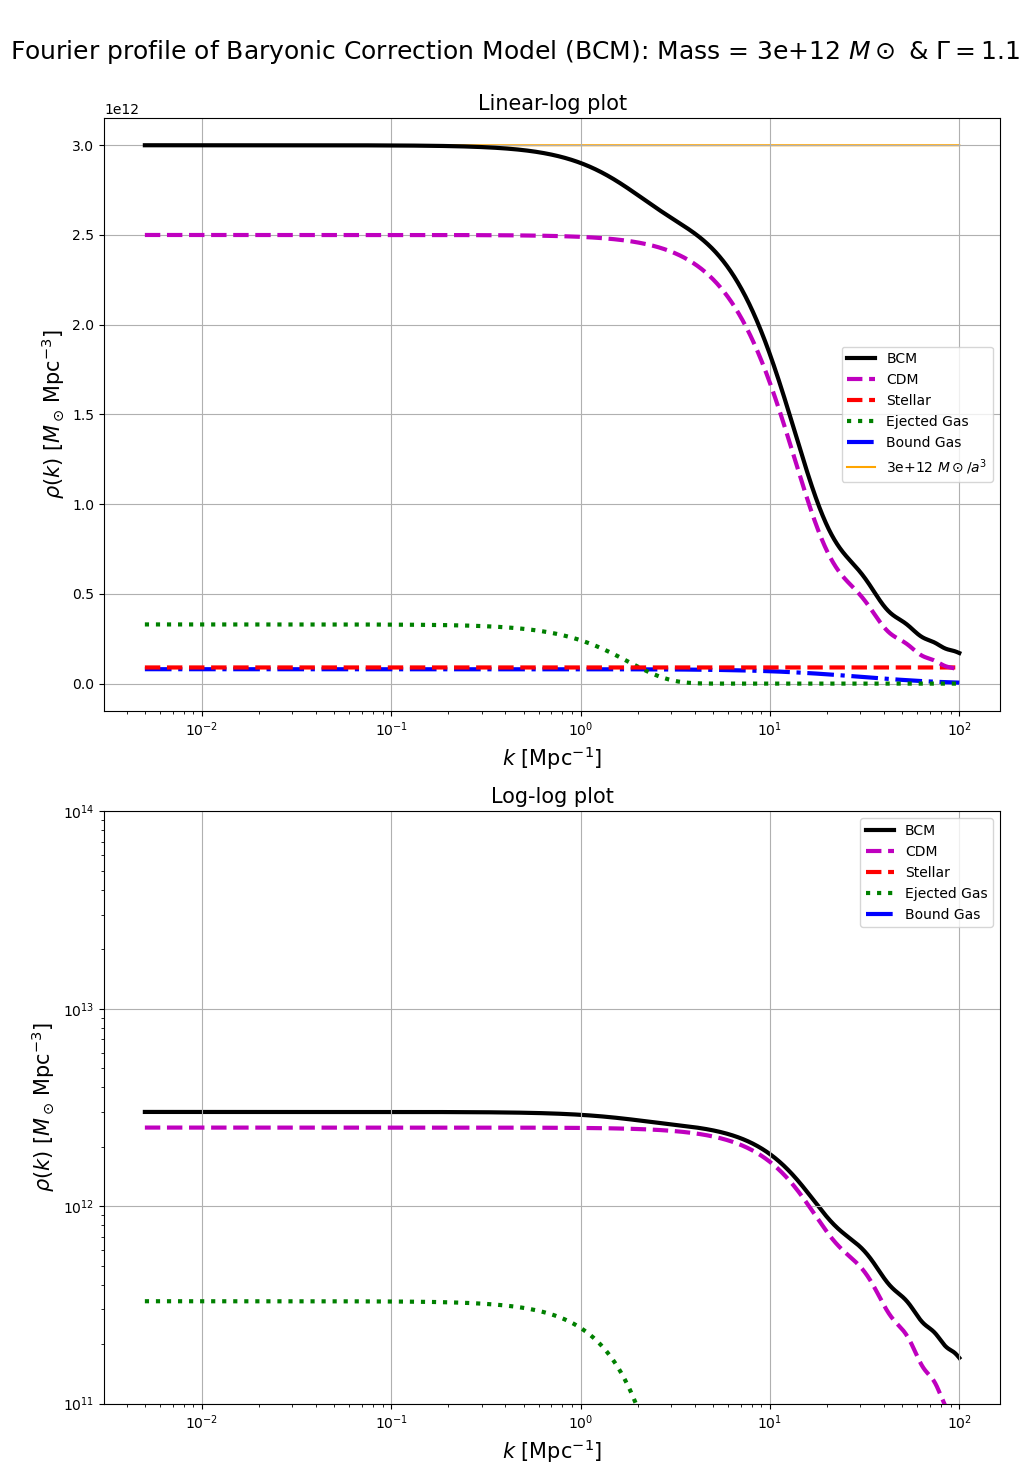

In [91]:
title_fourier = f'\nFourier profile of Baryonic Correction Model (BCM): Mass = {trial_M[0]:.1g} $M \\odot$ & $\\Gamma = ${trial_gamma}\n' 
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,15))
fig.suptitle(title_fourier, fontsize=18)

#for mass, col, bcm, stel, ej, bd in zip(trial_M[0], colours, bcm_fourier, stel_fourier, ej_fourier, bd_fourier):
ax1.plot(trial_k, bcm_fourier[0], 'k-', lw=3, zorder = 6, label='BCM')
ax1.plot(trial_k, bcm_profile.f_c*nfw_fourier_true[0], 'm--', lw=3, zorder = 5, label='CDM')
ax1.plot(trial_k, bcm_profile._f_bd(trial_M[0])[1]*stel_fourier[0], 'r--', lw=3, zorder = 4, label='Stellar')
ax1.plot(trial_k, trial_f_ej*ej_fourier[0], 'g:', lw=3, zorder = 3, label='Ejected Gas')
ax1.plot(trial_k, bcm_profile._f_bd(trial_M[0])[0]*bd_fourier[0,0], 'b-.', lw=3, zorder = 2, label='Bound Gas')
ax1.plot(trial_k, 1*trial_k + trial_M[0], 'orange', zorder=1, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')
    
ax1.set_ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax1.set_xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
ax1.set_title('Linear-log plot', fontsize=15)
ax1.grid(True)
ax1.legend(loc='best')
ax1.set_xscale('log'); 

ax2.plot(trial_k, bcm_fourier[0], 'k-', lw=3, zorder = 1, label='BCM')
ax2.plot(trial_k, bcm_profile.f_c*nfw_fourier_true[0], 'm--', lw=3, zorder = 6, label='CDM')
ax2.plot(trial_k, bcm_profile._f_bd(trial_M[0])[1]*stel_fourier[0], 'r--', lw=3, zorder = 5, label='Stellar')
ax2.plot(trial_k, trial_f_ej*ej_fourier[0], 'g:', lw=3, zorder = 4, label='Ejected Gas')
ax2.plot(trial_k, bcm_profile._f_bd(trial_M[0])[0]*bd_fourier[0,0], 'b-.', lw=3, zorder = 3, label='Bound Gas')
#plt.plot(trial_k, 1*trial_k + trial_M[0], 'orange', zorder=2, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')
    
ax2.set_ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax2.set_xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
ax2.set_title('Log-log plot', fontsize=15)
ax2.grid(True)
ax2.legend(loc='best')
ax2.set_xscale('log'); 
ax2.set_ylim(10E10, 10E13)
ax2.set_yscale('log');

fig.tight_layout();
#fig.savefig('./BCM_fourier_plot_0108.pdf', dpi=500);

----- 

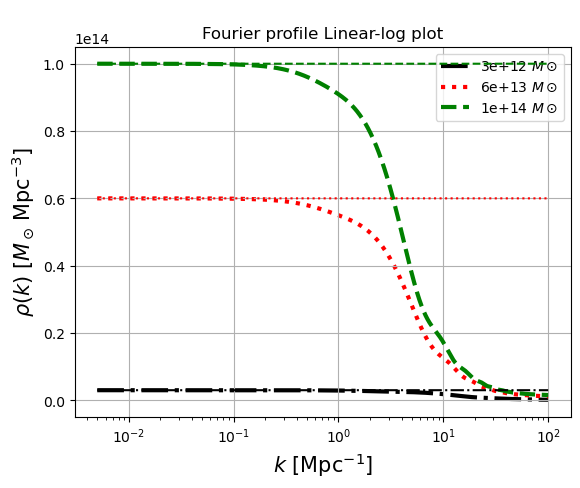

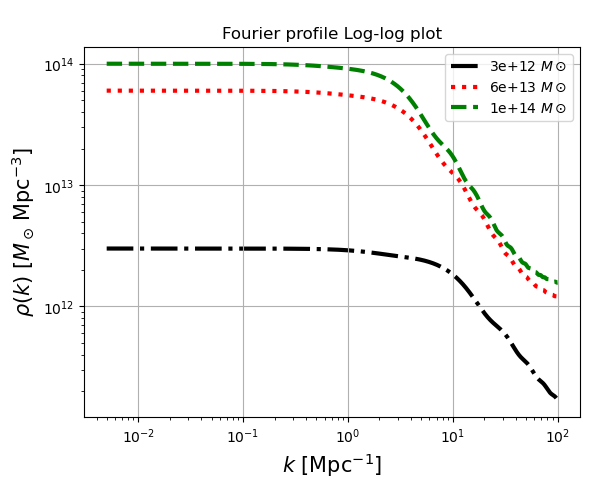

In [93]:
colours, i = ['k-.', 'r:', 'g--'], 0
title_fourier = '\nFourier profile' 
for mass, col, fourier in zip(trial_M, colours, bcm_fourier ):
    plt.plot(trial_k, fourier, col, lw=3, zorder = i, label=f'{mass:.1g} $M \\odot $')
    plt.plot(trial_k, 1*trial_k + mass, col, zorder=(10-i))#, label=f'{mass:.1g} $M \\odot /a^3$')  # here, a=1
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title(title_fourier+' Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');   #plt.xlim(1e-2,1e5);   #plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for j, col in zip(trial_M, colours):
    plt.plot(trial_k, bcm_fourier [i], col, lw=3, zorder = i, label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title(title_fourier+' Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log'); 

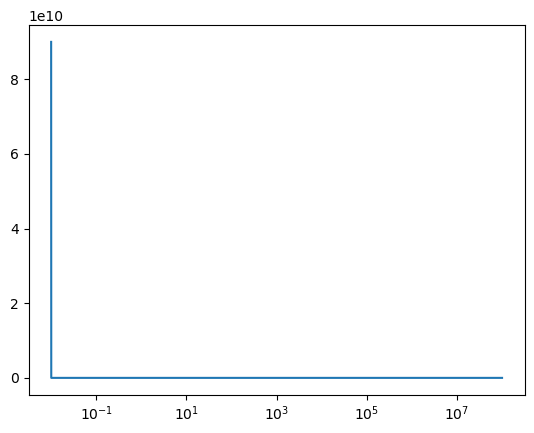

In [144]:
#for mass, stel in zip(trial_M, stel_real):
 #   plt.plot(trial_r, stel)
plt.plot(trial_r, bcm_profile._f_bd(trial_M[0])[1]*stel_real[0]); # bcm_profile._f_bd(trial_M[0])[1]*
plt.xscale('log')
#plt.yscale('log');

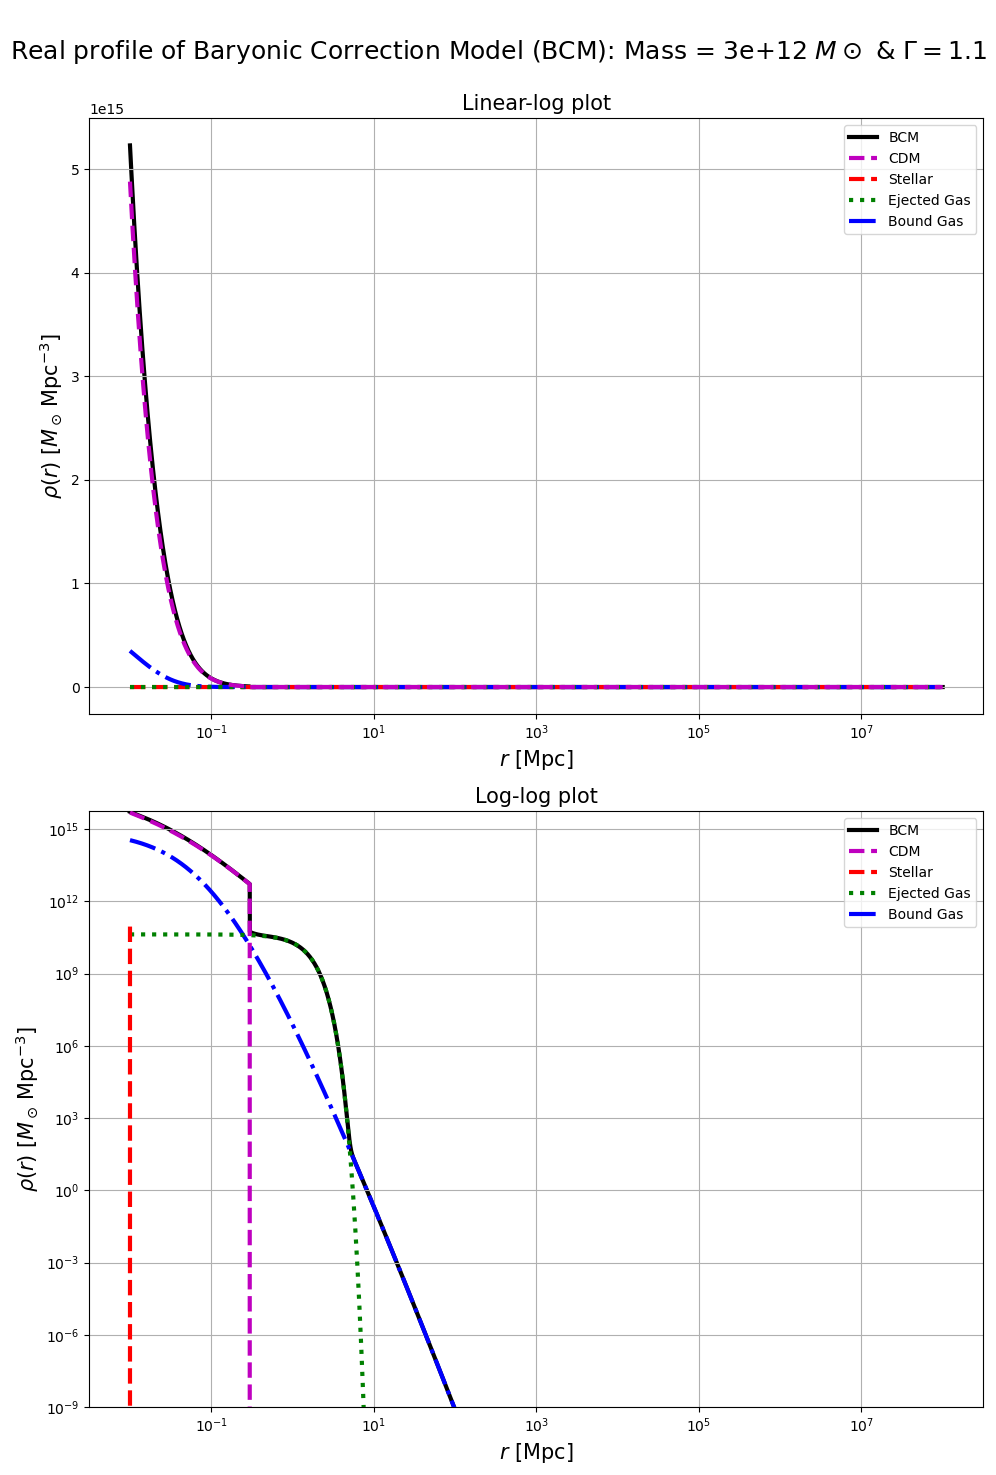

In [160]:
title_real = f'\nReal profile of Baryonic Correction Model (BCM): Mass = {trial_M[0]:.1g} $M \\odot$ & $\\Gamma = ${trial_gamma}\n' 
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,15))
fig.suptitle(title_real, fontsize=18)

ax1.plot(trial_r, bcm_real[0], 'k-', lw=3, zorder = 1, label='BCM')
ax1.plot(trial_r, bcm_profile.f_c*nfw_real_true[0], 'm--', lw=3, zorder = 5, label='CDM')
ax1.plot(trial_r, bcm_profile._f_bd(trial_M[0])[1]*stel_real[0], 'r--', lw=3, zorder = 2, label='Stellar')
ax1.plot(trial_r, trial_f_ej*ej_real[0], 'g:', lw=3, zorder = 4, label='Ejected Gas')
ax1.plot(trial_r, bcm_profile._f_bd(trial_M[0])[0]*bd_real[0], 'b-.', lw=3, zorder = 3, label='Bound Gas')
# ax1.plot(trial_r, 1*trial_r + trial_M[0], 'orange', zorder=1, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')
    
ax1.set_ylabel(r'$\rho(r)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax1.set_xlabel(r'$r\, \,[{\rm Mpc}]$', fontsize=15);
ax1.set_title('Linear-log plot', fontsize=15)
ax1.grid(True)
ax1.legend(loc='best')
#ax1.set_ylim(-0.1E15,4E15)
ax1.set_xscale('log'); 

ax2.plot(trial_r, bcm_real[0], 'k-', lw=3, zorder = 1, label='BCM')
ax2.plot(trial_r, bcm_profile.f_c*nfw_real_true[0], 'm--', lw=3, zorder = 6, label='CDM')
ax2.plot(trial_r, bcm_profile._f_bd(trial_M[0])[1]*stel_real[0], 'r--', lw=3, zorder = 5, label='Stellar')
ax2.plot(trial_r, trial_f_ej*ej_real[0], 'g:', lw=3, zorder = 4, label='Ejected Gas')
ax2.plot(trial_r, bcm_profile._f_bd(trial_M[0])[0]*bd_real[0], 'b-.', lw=3, zorder = 3, label='Bound Gas')
#plt.plot(trial_r, 1*trial_r + trial_M[0], 'orange', zorder=2, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')
    
ax2.set_ylabel(r'$\rho(r)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax2.set_xlabel(r'$r\, \,[{\rm Mpc}]$', fontsize=15);
ax2.set_title('Log-log plot', fontsize=15)
ax2.grid(True)
ax2.legend(loc='best')
ax2.set_xscale('log'); 
#ax2.set_ylim(10E-30, 10E10)
ax2.set_ylim(10E-10)
ax2.set_yscale('log');

fig.tight_layout();
#fig.savefig('./BCM_real_plot_0108.pdf', dpi=500);

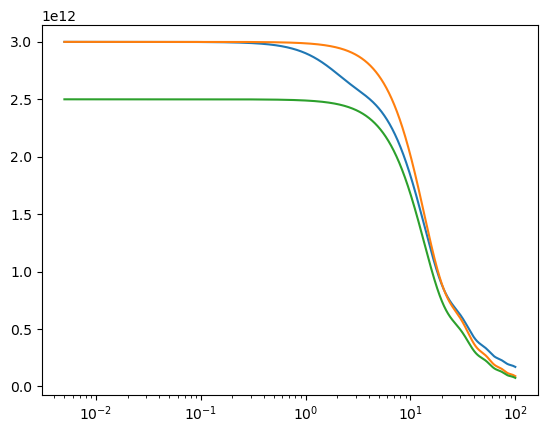

In [184]:
plt.plot(trial_k, bcm_fourier[0])
plt.plot(trial_k, nfw_fourier_true[0])
plt.plot(trial_k, bcm_profile.f_c*nfw_fourier_true[0]);
plt.xscale('log')

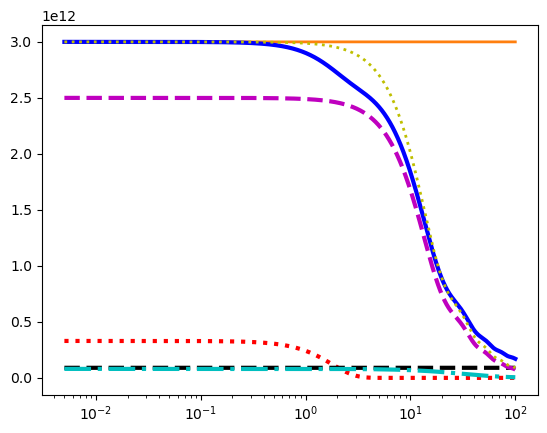

In [198]:
plt.plot(trial_k, bcm_fourier[0], 'b-', 
         lw=3, zorder = 5, label='BCM')
plt.plot(trial_k, nfw_fourier_true[0], 'y:', zorder=6, lw=2, label='No Baryons')
#ax1.plot(trial_k, nfw_fourier_true[0], 'k:', lw=2, zorder = 5, label='No Baryons')
plt.plot(trial_k, bcm_profile.f_c*nfw_fourier_true[0], 'm--', 
         lw=3, zorder = 5, label='CDM')
plt.plot(trial_k, bcm_profile._f_bd(trial_M[0])[1]*stel_fourier[0], 'k--', 
         lw=3, zorder = 3, label='Stellar')
plt.plot(trial_k, trial_f_ej*ej_fourier[0], 'r:', 
         lw=3, zorder = 2, label='Ejected Gas')
plt.plot(trial_k, bcm_profile._f_bd(trial_M[0])[0]*bd_fourier[0,0], 'c-.', 
         lw=3, zorder = 4, label='Bound Gas')
plt.plot(trial_k, 1*trial_k + trial_M[0], 'tab:orange', zorder=1, lw=2, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')

plt.xscale('log');

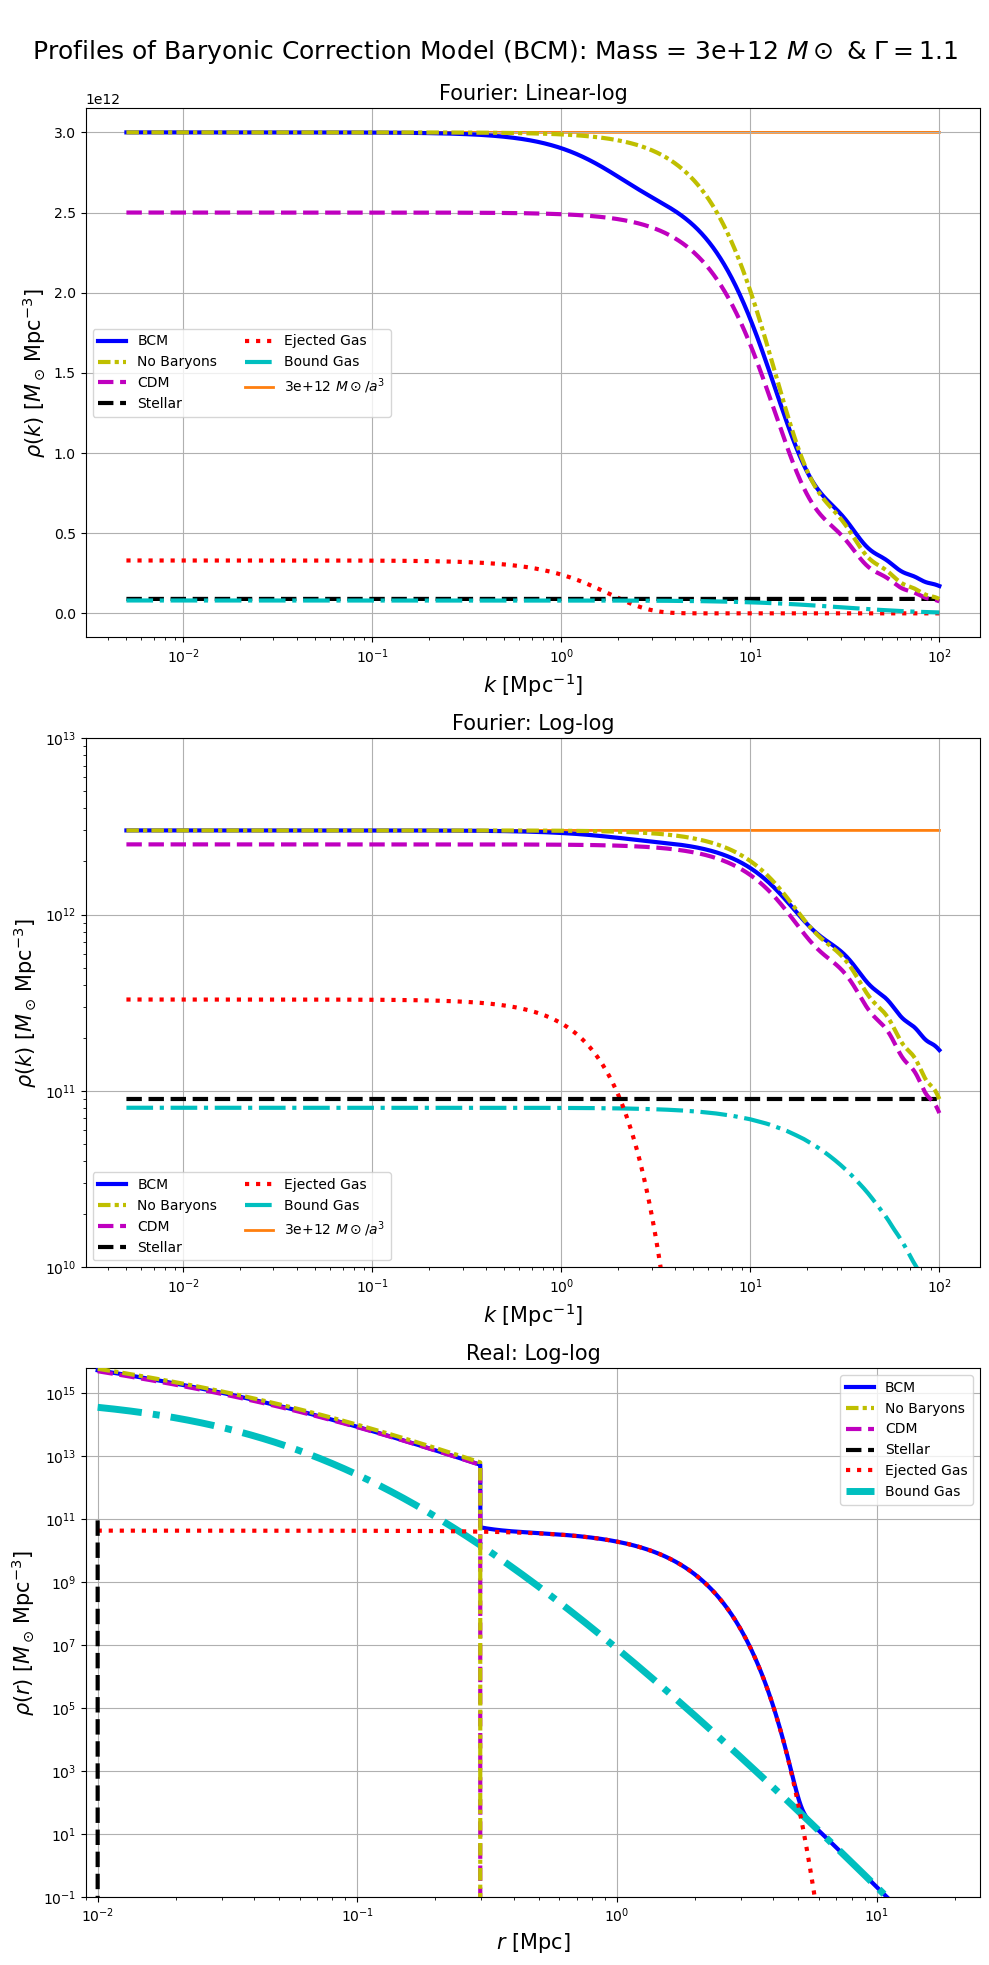

In [256]:
# Creating Combined plot for Week 4 (5) presentation => Real & Fourier

title_combined = f'\nProfiles of Baryonic Correction Model (BCM): Mass = {trial_M[0]:.1g} $M \\odot$ & $\\Gamma = ${trial_gamma}\n' 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,20))
fig.suptitle(title_combined, fontsize=18)

ax1.plot(trial_k, bcm_fourier[0], 'b-', 
         lw=3, zorder = 5, label='BCM')
ax1.plot(trial_k, nfw_fourier_true[0], linestyle=(0, (3,1,1,1)), color='y', lw=3, 
         zorder=6, label='No Baryons')
#ax1.plot(trial_k, nfw_fourier_true[0], 'k:', lw=2, zorder = 5, label='No Baryons')
ax1.plot(trial_k, bcm_profile.f_c*nfw_fourier_true[0], 'm--', 
         lw=3, zorder = 5, label='CDM')
ax1.plot(trial_k, bcm_profile._f_bd(trial_M[0])[1]*stel_fourier[0], 'k--', lw=3, zorder = 3, label='Stellar')
ax1.plot(trial_k, trial_f_ej*ej_fourier[0], 'r:', 
         lw=3, zorder = 2, label='Ejected Gas')
ax1.plot(trial_k, bcm_profile._f_bd(trial_M[0])[0]*bd_fourier[0,0], 'c-.', 
         lw=3, zorder = 4, label='Bound Gas')
ax1.plot(trial_k, 1*trial_k + trial_M[0], 'tab:orange', zorder=1, lw=2, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')
    
ax1.set_ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax1.set_xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
ax1.set_title('Fourier: Linear-log', fontsize=15)
ax1.grid(True)
ax1.legend(loc='best', ncol=2)
ax1.set_xscale('log'); 
##########################
ax2.plot(trial_k, bcm_fourier[0], 'b-', lw=3, zorder = 5, label='BCM')
ax2.plot(trial_k, nfw_fourier_true[0], linestyle=(0, (3,1,1,1)), color='y', lw=3, 
         zorder=6, label='No Baryons')
ax2.plot(trial_k, bcm_profile.f_c*nfw_fourier_true[0], 'm--', lw=3, zorder = 6, label='CDM')
ax2.plot(trial_k, bcm_profile._f_bd(trial_M[0])[1]*stel_fourier[0], 'k--', lw=3, zorder = 5, label='Stellar')
ax2.plot(trial_k, trial_f_ej*ej_fourier[0], 'r:', lw=3, zorder = 4, label='Ejected Gas')
ax2.plot(trial_k, bcm_profile._f_bd(trial_M[0])[0]*bd_fourier[0,0], 'c-.', lw=3, zorder = 3, label='Bound Gas')
ax2.plot(trial_k, 1*trial_k + trial_M[0], 'tab:orange', zorder=1, lw=2, label=f'{trial_M[0]:.1g} $M \\odot /a^3$')
    
ax2.set_ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax2.set_xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
ax2.set_title('Fourier: Log-log', fontsize=15)
ax2.grid(True)
ax2.legend(loc='best', ncol=2)
ax2.set_xscale('log'); 
ax2.set_ylim(1E10, 1E13)
#ax2.set_ylim(5E10)
ax2.set_yscale('log');
#########################
ax3.plot(trial_r, bcm_real[0], 'b-', lw=3, zorder = 3, label='BCM')
ax3.plot(trial_r, nfw_real_true[0], linestyle=(0, (3,1,1,1)), color='y', lw=3, 
         zorder=7, label='No Baryons')
ax3.plot(trial_r, bcm_profile.f_c*nfw_real_true[0], 'm--', lw=3, zorder = 6, label='CDM')
ax3.plot(trial_r, bcm_profile._f_bd(trial_M[0])[1]*stel_real[0], 'k--', lw=3, zorder = 5, label='Stellar')
ax3.plot(trial_r, trial_f_ej*ej_real[0], 'r:', lw=3, zorder = 4, label='Ejected Gas')
ax3.plot(trial_r, bcm_profile._f_bd(trial_M[0])[0]*bd_real[0], 'c-.', lw=5, zorder = 3, label='Bound Gas')
    
ax3.set_ylabel(r'$\rho(r)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax3.set_xlabel(r'$r\, \,[{\rm Mpc}]$', fontsize=15);
ax3.set_title('Real: Log-log', fontsize=15)
ax3.grid(True)
ax3.legend(loc='best')
ax3.set_xscale('log'); 
ax3.set_ylim(1E-1)
ax3.set_xlim(9E-3, 2.5E1)
ax3.set_yscale('log');

fig.tight_layout();
#fig.savefig('./BCM_real&Fourier_plot_0108.pdf', dpi=500);